In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import yelpapi









In [2]:
census_pd = pd.read_csv("project_data.csv")


# Preview the data
census_pd.head()





,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,Alaska,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072
2,Arizona,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,20.442442,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901
3,Arkansas,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,17.985693,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489
4,California,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,19.192177,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290


In [3]:
from yelpapi import YelpAPI
yelp_api = YelpAPI('clXvdDssfwpiryl9URikQMy0kRfdf8yZBWqPSc4pk-bdiK52Awc7eAQxakB8rv0c_xlMLyU7Saw_In-8dI6UHvIN2HQC739yByp0AV_VMiltc8yIKzLnzlYMUV_aW3Yx')


def price_rating(state): 

    results = []
    states = []
    prices = []
    cuisines = []
    ratings = []
    totalreviews = []
    search_results = yelp_api.search_query(term="restaurant", location=state, limit=50, sort_by="review_count")
    for business in search_results['businesses']:
        
        try:
            price = business['price']
        except KeyError:
            price = "n/a"
        try:    
            rating= business['rating']
        except KeyError:
            rating = "n/a"
            
        try:
            cuisine=business["categories"][0]['alias']
        except KeyError:
            cuisine = "n/a"
            
        try:
            state=business["location"]['state']
        except KeyError:
            state="n/a"
        try:    
            reviews=business['review_count']
        except KeyError:
            reviews="n/a"
            
        states.append(state)
        prices.append(price)
        ratings.append(rating)
        cuisines.append(cuisine)
        totalreviews.append(reviews)
        
    food_df = pd.DataFrame({'States': states, 'Prices': prices, 'Ratings': ratings, 'Cuisines': cuisines, 'Reviews': totalreviews})
        
    return food_df
all_food_data = pd.DataFrame()

    
for state in census_pd['State']:
    all_food_data=pd.concat([all_food_data, price_rating(state)])

all_food_data
    

   


,States,Prices,Ratings,Cuisines,Reviews
0,AL,$$,4.5,bbq,621.0
1,AL,$$,4.5,mexican,480.0
2,AL,$$,4.5,bbq,460.0
3,AL,$$,4.5,cocktailbars,449.0
4,AL,$$,4.0,latin,433.0
5,AL,$$,4.0,burgers,405.0
6,AL,$$,4.5,southern,347.0
7,AL,$,4.0,burgers,339.0
8,AL,$$,3.5,bbq,322.0
9,AL,$,4.5,cafes,319.0


In [5]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [6]:
#maria
census_pd['States'] = census_pd['State'].map(us_state_abbrev)
census_pd

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,States
0,Alabama,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723,AL
1,Alaska,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072,AK
2,Arizona,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901,AZ
3,Arkansas,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489,AR
4,California,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290,CA
5,Colorado,5278906,2648667,2630239,20.784380,69.895572,3.546377,0.573833,2.661997,0.119646,...,23.659547,9.867557,9.109790,2101.229784,78.643528,14.408333,6.760922,0.189239,7.194094,CO
6,Connecticut,3593222,1751607,1841615,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,...,23.498549,7.287062,10.088513,2138.555822,80.548368,12.997098,6.276300,0.180653,9.382104,CT
7,Delaware,926454,448413,478041,8.824766,64.632710,20.743925,0.259813,3.268692,0.019159,...,24.312150,8.321028,10.478037,1989.981651,81.122897,14.500000,4.237383,0.137383,7.952336,DE
8,District of Columbia,647484,306674,340810,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,...,19.022905,3.234078,4.708380,1887.234637,69.901676,25.828492,4.159218,0.109497,11.624581,DC
9,Florida,19645772,9600009,10045763,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,...,27.157345,9.296615,9.204561,2012.082686,80.926404,12.578877,6.328853,0.167643,10.021406,FL


In [8]:
merge_table = pd.merge(all_food_data, census_pd, on="States")
merge_table

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,AL,$$,4.5,bbq,621.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,AL,$$,4.5,mexican,480.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
2,AL,$$,4.5,bbq,460.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
3,AL,$$,4.5,cocktailbars,449.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
4,AL,$$,4.0,latin,433.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
5,AL,$$,4.0,burgers,405.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
6,AL,$$,4.5,southern,347.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
7,AL,$,4.0,burgers,339.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
8,AL,$$,3.5,bbq,322.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
9,AL,$,4.5,cafes,319.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723


In [9]:
#maria
expensive = merge_table.loc[merge_table["Prices"] == "$$$", :]
expensive.head()

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
10,AL,$$$,3.5,cajun,318.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
31,AL,$$$,4.5,southern,243.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
34,AL,$$$,4.5,seafood,233.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
40,AL,$$$,4.0,bars,222.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
54,AK,$$$,4.0,seafood,754.0,Alaska,733375,384160,349215,5.909581,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072


In [10]:
#maria-****
grouped_count_data = expensive.groupby(['States']).count()['Ratings']
grouped_count_data.head(20)

States
AK     6
AL     4
AR     2
AZ     3
CA     2
CO     8
CT     2
DC     8
DE     4
GA     6
HI     2
IA     2
ID     4
IL    11
IN     4
KS     4
KY     3
LA    10
MA    15
MD     5
Name: Ratings, dtype: int64

In [11]:
grouped_income_data = expensive.groupby(['States']).mean()['IncomePerCap']
grouped_income_data.head(20)

States
AK    33003.228916
AL    22840.097021
AR    22126.816058
AZ    26363.113891
CA    31154.595604
CO    32248.106280
CT    38528.915459
DC    46214.966480
DE    31446.654206
GA    25188.585890
HI    31189.028571
IA    27152.835966
ID    23439.120805
IL    29669.922632
IN    24021.820598
KS    26650.180501
KY    23609.212094
LA    24441.737123
MA    36427.568989
MD    36285.163427
Name: IncomePerCap, dtype: float64

In [12]:
df = pd.DataFrame({"count": grouped_count_data, "income": grouped_income_data})

In [13]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.sort_values("count", inplace=True, ascending=False)

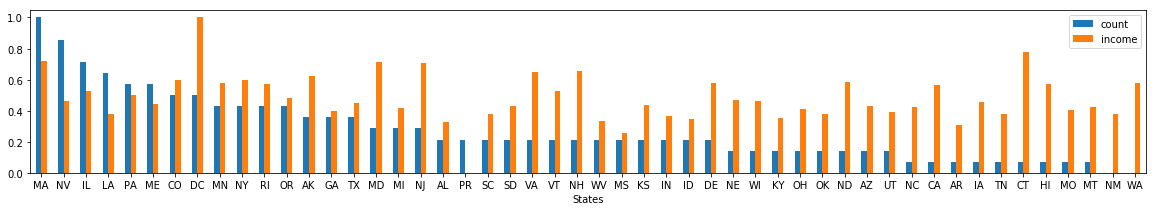

In [14]:

ax = df_norm.plot.bar(rot=0, figsize=(20,3))

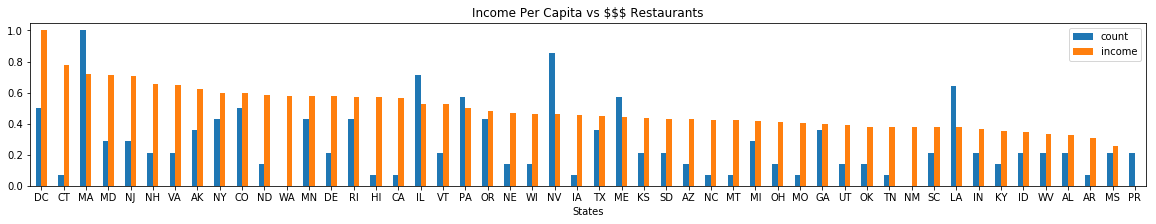

In [15]:
#by income
df_norm.sort_values("income", inplace=True, ascending=False)
ax = df_norm.plot.bar(rot=0, figsize=(20,3), title="Income Per Capita vs $$$ Restaurants")
plt.savefig('plot.png')

In [16]:
affordable = merge_table.loc[merge_table["Prices"] == "$", :]
affordable.head()

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
7,AL,$,4.0,burgers,339.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
9,AL,$,4.5,cafes,319.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
19,AL,$,4.0,grocery,278.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
49,AL,$,4.5,burgers,203.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
68,AK,$,5.0,hotdog,264.0,Alaska,733375,384160,349215,5.909581,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072


In [17]:
grouped_onecount_data = affordable.groupby(['States']).count()['Ratings']
grouped_onecount_data.head(20)

States
AK     2
AL     4
AR     9
CA    10
CO     2
CT    11
DC     4
DE     6
GA     4
HI     5
IA    13
ID     9
IL     2
IN     6
KS    10
KY     3
LA     2
MA     3
MD     3
ME     1
Name: Ratings, dtype: int64

In [18]:
grouped_income_data_one = affordable.groupby(['States']).mean()['IncomePerCap']
grouped_income_data_one.head(20)

States
AK    33003.228916
AL    22840.097021
AR    22126.816058
CA    31154.595604
CO    32248.106280
CT    38528.915459
DC    46214.966480
DE    31446.654206
GA    25188.585890
HI    31189.028571
IA    27152.835966
ID    23439.120805
IL    29669.922632
IN    24021.820598
KS    26650.180501
KY    23609.212094
LA    24441.737123
MA    36427.568989
MD    36285.163427
ME    26837.390313
Name: IncomePerCap, dtype: float64

In [19]:
df_one = pd.DataFrame({"count": grouped_onecount_data, "income": grouped_income_data_one})

In [20]:
df_one_norm = (df - df.min()) / (df.max() - df.min())
df_one_norm.sort_values("count", inplace=True, ascending=False)

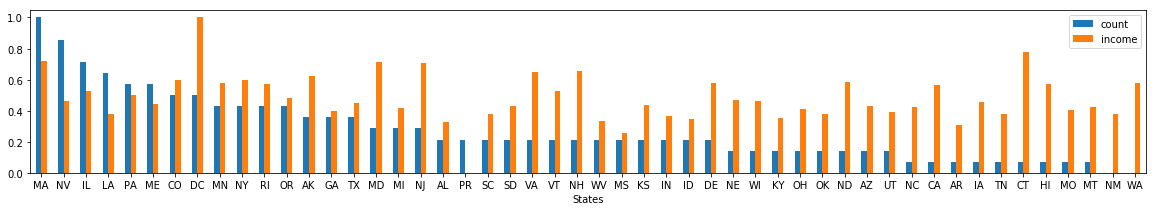

In [21]:
az = df_one_norm.plot.bar(rot=0, figsize=(20,3))

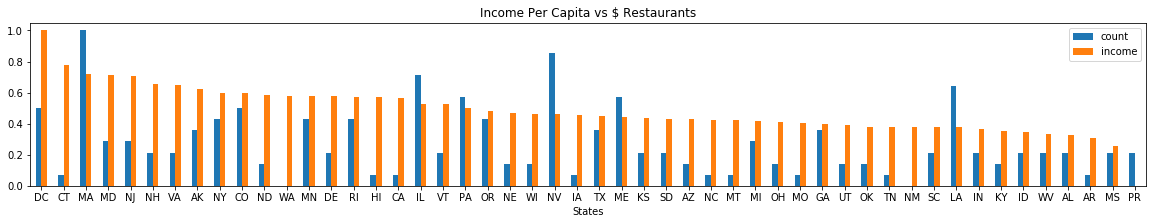

In [22]:
#by income
df_one_norm.sort_values("income", inplace=True, ascending=False)
zz = df_one_norm.plot.bar(rot=0, figsize=(20,3), title="Income Per Capita vs $ Restaurants")
plt.savefig('plot1.png')

In [23]:
ratio_one = (grouped_income_data_one/grouped_onecount_data)
ratio_one.head()

States
AK    16501.614458
AL     5710.024255
AR     2458.535118
CA     3115.459560
CO    16124.053140
dtype: float64

In [24]:
ratio_three = (grouped_income_data/grouped_count_data)
ratio_three.head()

States
AK     5500.538153
AL     5710.024255
AR    11063.408029
AZ     8787.704630
CA    15577.297802
dtype: float64

In [25]:
from scipy import stats

In [26]:
(t_stat, p) = stats.ttest_ind(ratio_one, ratio_three, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is -1.6737008943531222.
p-value is 0.09738386597476226.


In [27]:
#Martel Poverty Data $$$$
grouped_poverty_data = expensive.groupby(['States']).mean()['Poverty']
grouped_poverty_data.head(20)

States
AK    11.338922
AL    21.282128
AR    20.575766
AZ    18.631860
CA    16.550419
CO    13.268259
CT    11.755744
DC    19.304469
DE    12.829907
GA    20.502712
HI    11.229936
IA    13.237789
ID    16.360067
IL    16.311689
IN    17.860572
KS    14.884474
KY    20.191787
LA    22.181633
MA    12.877207
MD    11.090693
Name: Poverty, dtype: float64

In [28]:
df_poverty = pd.DataFrame({"count": grouped_count_data, "poverty": grouped_poverty_data})

In [29]:
df_poverty_norm = (df_poverty - df_poverty.min()) / (df_poverty.max() - df_poverty.min())
df_poverty_norm.sort_values("count", inplace=True, ascending=False)

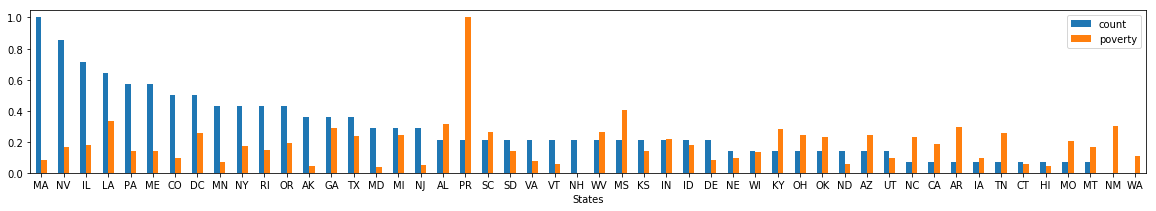

In [30]:
px = df_poverty_norm.plot.bar(rot=0, figsize=(20,3))

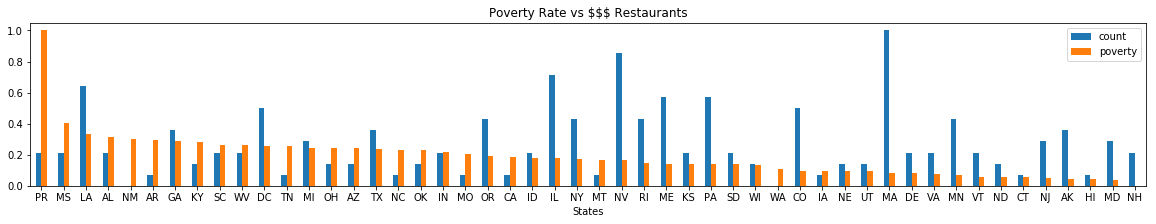

In [34]:
#by poverty
df_poverty_norm.sort_values("poverty", inplace=True, ascending=False)
px = df_poverty_norm.plot.bar(rot=0, figsize=(20,3), title="Poverty Rate vs $$$ Restaurants")
plt.savefig('plotpoverty.png')

In [36]:
#Martel Poverty Data $
grouped_poverty_data_two = affordable.groupby(['States']).mean()['Poverty']
grouped_poverty_data_two.head(20)

States
AK    11.338922
AL    21.282128
AR    20.575766
CA    16.550419
CO    13.268259
CT    11.755744
DC    19.304469
DE    12.829907
GA    20.502712
HI    11.229936
IA    13.237789
ID    16.360067
IL    16.311689
IN    17.860572
KS    14.884474
KY    20.191787
LA    22.181633
MA    12.877207
MD    11.090693
ME    14.986325
Name: Poverty, dtype: float64

In [37]:
df_poverty_two = pd.DataFrame({"count": grouped_onecount_data, "poverty": grouped_poverty_data_two})

In [38]:
df_poverty_two_norm = (df_poverty_two - df_poverty_two.min()) / (df_poverty_two.max() - df_poverty_two.min())
df_poverty_two_norm.sort_values("count", inplace=True, ascending=False)

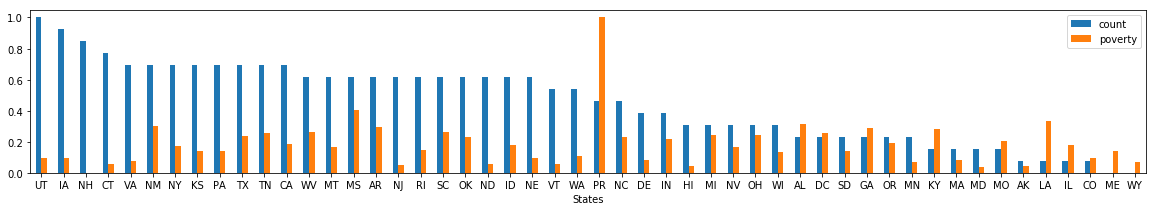

In [39]:
px_2 = df_poverty_two_norm.plot.bar(rot=0, figsize=(20,3))

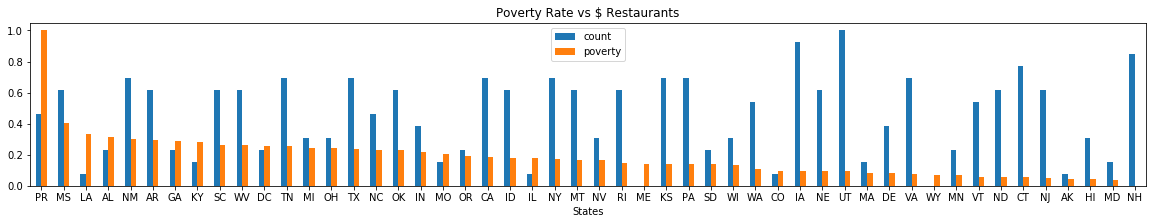

In [40]:
#by poverty
df_poverty_two_norm.sort_values("poverty", inplace=True, ascending=False)
px = df_poverty_two_norm.plot.bar(rot=0, figsize=(20,3), title="Poverty Rate vs $ Restaurants")
plt.savefig('plotpoverty2.png')

In [47]:
#Poverty Ratios
ratio_poverty = (grouped_poverty_data_two/grouped_onecount_data)
ratio_poverty.head()

States
AK    5.669461
AL    5.320532
AR    2.286196
CA    1.655042
CO    6.634130
dtype: float64

In [48]:
#Poverty Ratios
ratio_poverty_two = (grouped_poverty_data/grouped_count_data)
ratio_poverty_two.head()

States
AK     1.889820
AL     5.320532
AR    10.287883
AZ     6.210620
CA     8.275210
dtype: float64

In [51]:
#Martel Poverty tstat pvalue
(t_stat2, p2) = stats.ttest_ind(ratio_poverty_two, ratio_poverty, equal_var=False)
print("t-statistics is {}.".format(t_stat2))
print("p-value is {}.".format(p2))

t-statistics is 2.1394728748891425.
p-value is 0.0349922093978486.
